## Medical Cost Personal Insurance Datasets 

Problem Statement: Insurance Forecast by using Regression Algorithms Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated . 

Columns                                            

•         age: age of primary beneficiary

•         sex: insurance contractor gender, female, male

•       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•       children: Number of children covered by health insurance / Number of dependents 

•     smoker: Smoking 

•      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs? 

#### Load the dataset

In [1]:
 # Importing important libraries 

import numpy as np
import pandas as pd

#For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading Data
df=pd.read_csv('medical_cost_insurance.csv')


In [3]:
df.head() # printing top 5

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#checking shape of the data
df.shape

(1338, 7)

In [5]:
# checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking null values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe() # Describing the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## EDA (Exploratory Data Analysis)

## Visualise the data

<Axes: xlabel='charges', ylabel='Density'>

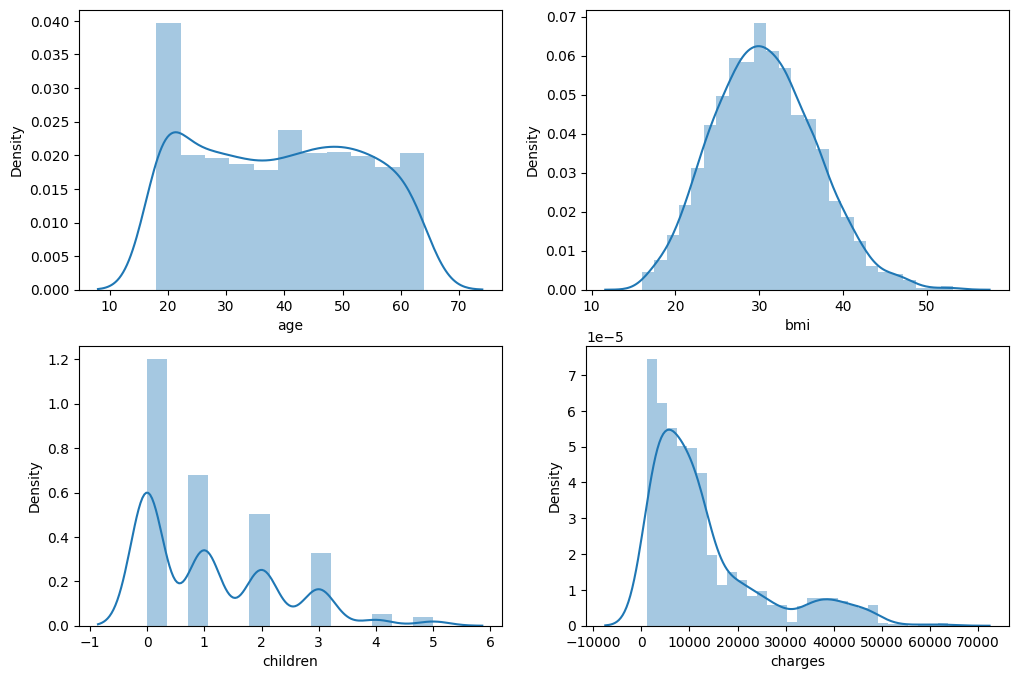

In [8]:
#Distribution of Continuous Variables

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(df['age'], ax=axs[0, 0])
sns.distplot(df['bmi'], ax=axs[0, 1])
sns.distplot(df['children'], ax=axs[1, 0])
sns.distplot(df['charges'], ax=axs[1, 1])

In [9]:
df_feature=df.drop('charges',axis=1)

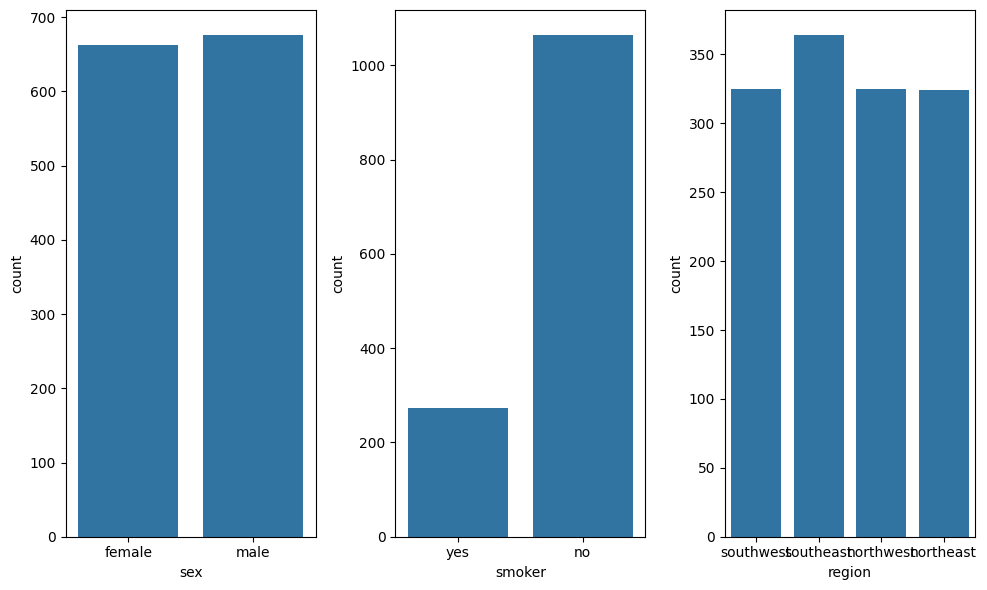

In [10]:
# Bar Plot for Categorical Variables
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
sns.countplot(x='sex', data=df, ax=axs[ 0])
sns.countplot(x='smoker', data=df, ax=axs[1])
sns.countplot(x='region', data=df, ax=axs[2])
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

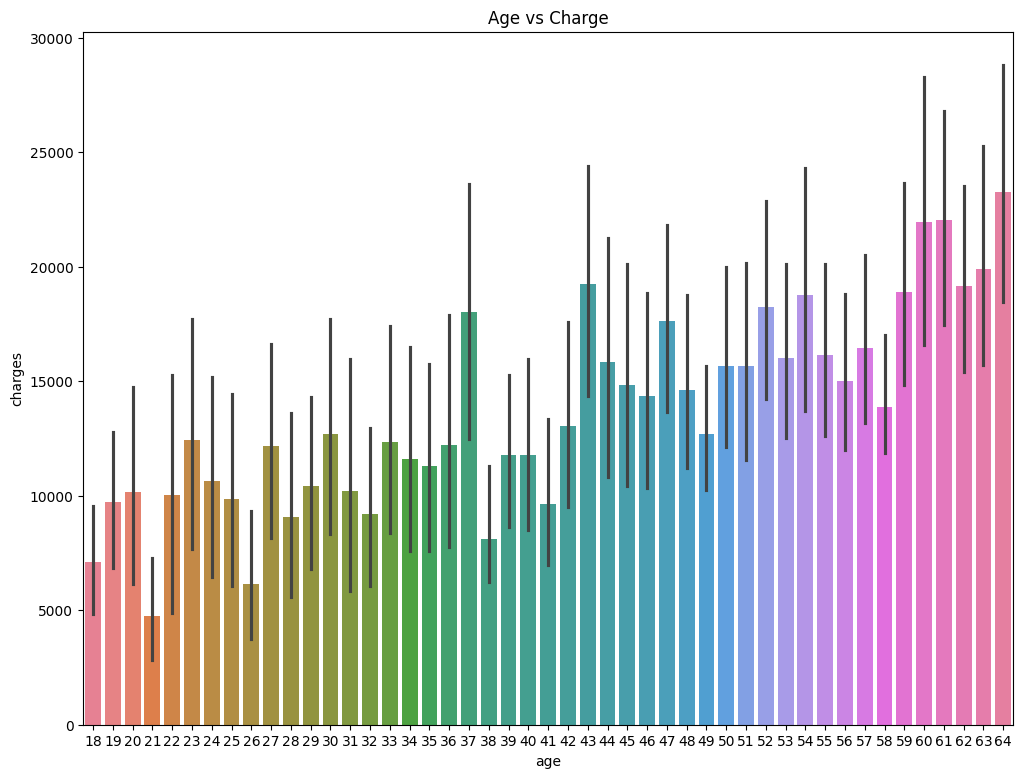

In [11]:
# Age vs Charges

plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')

Text(0.5, 1.0, 'BMI VS Charge')

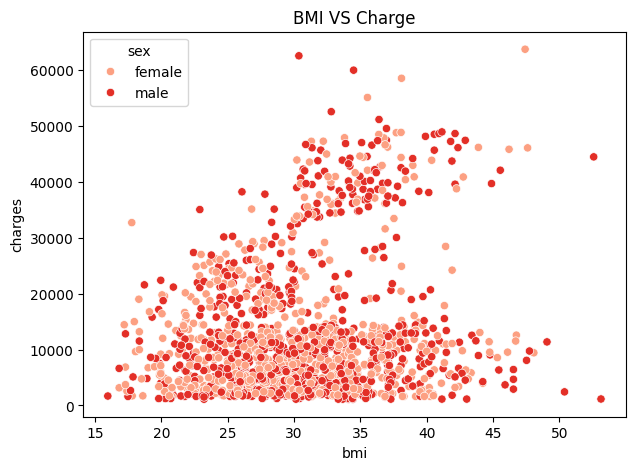

In [12]:
# BMI vs Charges

plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

## Feature Encoding

In [13]:
# perform feature encoding on categorical variables using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode smoker region and sex .
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['sex'] = le.fit_transform(df['sex'])

In [14]:
# scale charges using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['charges'] = scaler.fit_transform(df['charges'].values.reshape(-1,1))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.251611
1,18,1,33.770,1,0,2,0.009636
2,28,1,33.000,3,0,2,0.053115
3,33,1,22.705,0,0,1,0.333010
4,32,1,28.880,0,0,1,0.043816


## Handling Outliers

We are plotting boxplot for each column to check outliers

<Axes: ylabel='age'>

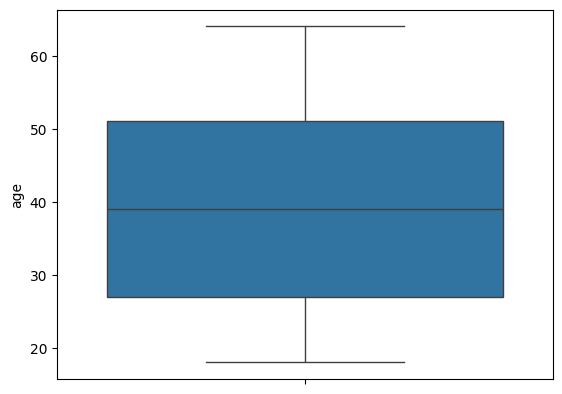

In [15]:

sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

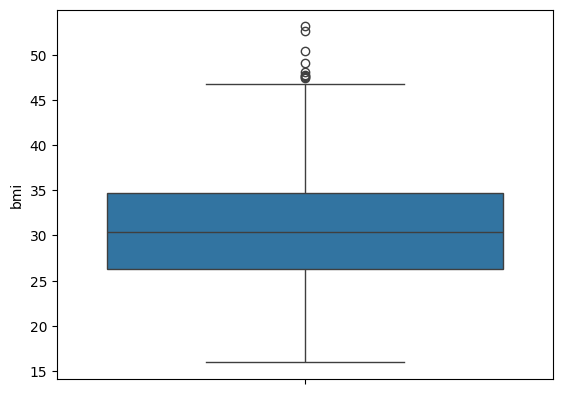

In [16]:
sns.boxplot(df['bmi'])

<Axes: ylabel='children'>

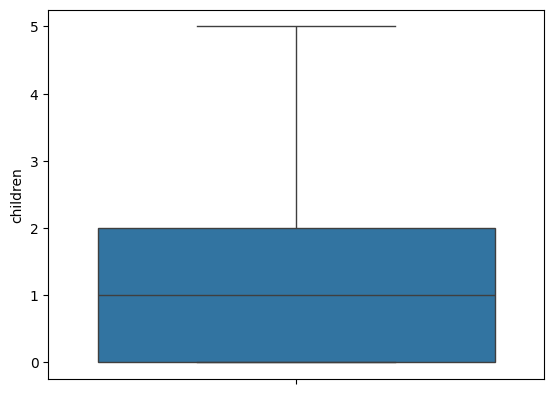

In [17]:
sns.boxplot(df['children'])

<Axes: ylabel='region'>

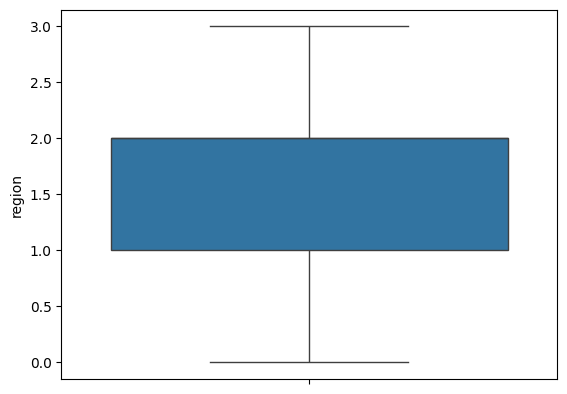

In [18]:
sns.boxplot(df['region'])

<Axes: ylabel='smoker'>

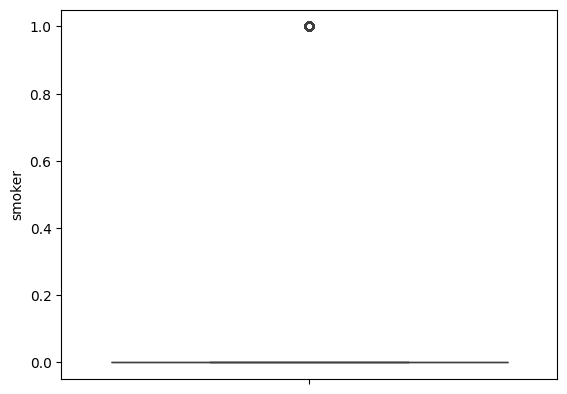

In [19]:
sns.boxplot(df['smoker'])

As we can see the ouliers in bmi and smoker column. So we use IQR method to remove outliers.
IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data.
Q3 represents the 75th percentile of the data.

In [20]:
## Using IQR Method 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
filtered_data = df[~((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))]

In [21]:
Q1 = df['smoker'].quantile(0.25)
Q3 = df['smoker'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
filtered_data = df[~((df['smoker'] < (Q1 - 1.5 * IQR)) | (df['smoker'] > (Q3 + 1.5 * IQR)))]

In [22]:
filtered_data

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,0.009636
2,28,1,33.000,3,0,2,0.053115
3,33,1,22.705,0,0,1,0.333010
4,32,1,28.880,0,0,1,0.043816
5,31,0,25.740,0,0,2,0.042056
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,0.164247
1333,50,1,30.970,3,0,1,0.151299
1334,18,0,31.920,0,0,0,0.017305
1335,18,0,36.850,0,0,2,0.008108


## Check multicollinearility

<Axes: >

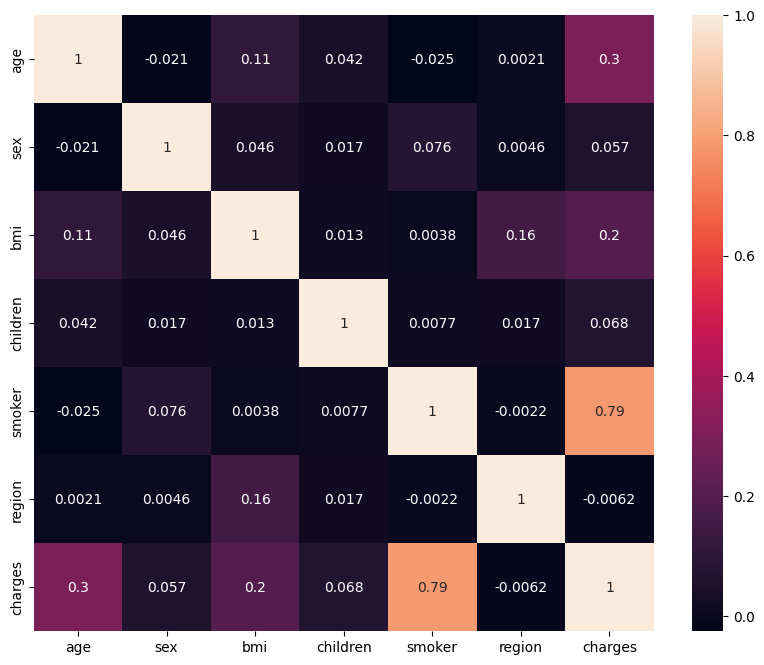

In [23]:
# draw correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

## Split the data 

In [24]:
# split data into features and target
X = df.drop(columns=['charges'])
y = df['charges']

In [25]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


## Model Training And Evaluation

#### Linear Regression
Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.

In [26]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on test data
y_pred = model.predict(X_test)


In [28]:
y_pred

array([ 1.24544508e-01,  9.56833115e-02,  5.71236482e-01,  1.33857851e-01,
        4.13281304e-01,  1.54335655e-01, -1.42952294e-02,  2.52533236e-01,
       -1.04141439e-03,  1.61951799e-01,  4.29805993e-01,  1.32524836e-01,
        6.71116593e-02,  5.95994382e-01,  6.25417979e-01,  5.75035397e-01,
        2.26119263e-01,  5.56168956e-01,  1.28611131e-01,  4.85070382e-01,
        4.27131451e-02,  1.42843746e-01,  1.90060510e-02,  9.50147959e-02,
        1.63299832e-01,  1.88127197e-01,  2.12725945e-01,  8.11477001e-02,
        1.40388467e-01,  1.78396205e-02,  1.26717702e-01,  1.91523786e-01,
        5.58006993e-02,  3.74476047e-02,  5.23695138e-02,  1.89087240e-01,
        1.28585743e-02,  1.21886997e-01,  5.14017895e-01,  5.03069919e-01,
        4.35851027e-02,  5.18531170e-02,  2.06850525e-01,  1.65315230e-01,
        1.23025784e-01,  1.74373973e-01,  6.70555182e-02,  3.15863303e-02,
        5.49489642e-01,  1.28969266e-01,  2.35797361e-01,  2.04979373e-02,
        1.79982552e-01,  

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00856982679944619
R-squared: 0.7833463107364538


In [30]:
# do cross validation
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.71605226 0.80286251 0.72459593 0.65909301 0.76711092]
Mean CV Score:  0.73394292442297


In [31]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,0,25.80,0,0,3,0.014144
1337,61,0,29.07,0,1,1,0.447249


In [32]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
print("Charges is : ",model.predict(scaler.transform([[61,0,29.07,0,1,1,]])))

Charges is :  [0.53444617]


In [34]:
# do cross validation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00856982679944619
R-squared: 0.7833463107364538


## Random Forest 
Random Forest Regression is a versatile machine-learning technique for predicting numerical values. It combines the predictions of multiple decision trees to reduce overfitting and improve accuracy. 

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")

Random Forest - MSE: 0.005413625730587331, R-squared: 0.8631381923728492


In [36]:
# Do cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.8168116  0.89748684 0.79538355 0.78195316 0.83687013]
Mean CV Score:  0.8257010560323487


## Decision Tree 
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - MSE: {mse_dt}, R-squared: {r2_dt}")

Decision Tree - MSE: 0.010773495583966784, R-squared: 0.7276353864372422


In [38]:
# Do cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.72529184 0.75160365 0.58869566 0.61967957 0.80307271]
Mean CV Score:  0.6976686874181317


## Support Vector Regression
Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

In [39]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR - MSE: {mse_svr}, R-squared: {r2_svr}")

SVR - MSE: 0.011086337695801566, R-squared: 0.719726428733408


In [40]:
# Do cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.29217081 0.3430712  0.3426303  0.30223977 0.33911267]
Mean CV Score:  0.3238449524307877


## Hyperparameter Tunning

####  Best Algorithm is Random Forest

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the model (Random Forest)
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print(f"Tuned Random Forest - Mean Squared Error: {mse_rf_best}")
print(f"Tuned Random Forest - R-squared: {r2_rf_best}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest - Mean Squared Error: 0.004828840277812211
Tuned Random Forest - R-squared: 0.8779221464405755


## Saving the model

In [42]:
# Training Data without Scaling for RandomClassifier

df.head()

X_s=df.drop('charges',axis=1).values
y_s=df['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_s,y_s,test_size=0.2, random_state=42)

In [43]:
regressor=RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
regressor.fit(X_train_s,y_train_s.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [44]:
y_pred_rf_train_s=regressor.predict(X_train_s)
r2_score_rf_train_s=r2_score(y_train_s, y_pred_rf_train_s)

y_pred_rf_test_s=regressor.predict(X_test_s)
r2_score_rf_test_s=r2_score(y_test_s, y_pred_rf_test_s)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_s))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_s))

R2 score (train) : 0.885
R2 score (test) : 0.878


In [45]:
pred=regressor.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

print('{0:.3f}'.format(pred))

0.286


In [46]:
import pickle

Pkl_Filename="rf_reg.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)

In [47]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded=pickle.load(file)

In [48]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [49]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

print('{0:.3f}'.format(pred))

0.286
